In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e5/sample_submission.csv
/kaggle/input/playground-series-s5e5/train.csv
/kaggle/input/playground-series-s5e5/test.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


# **Overview of the Data**

In [3]:
d_train = pd.read_csv('/kaggle/input/playground-series-s5e5/train.csv')

In [4]:
print(f'Data Shape: {d_train.shape}')

print(f'\nData Info:')
d_train.info()

print(f'\nNumerical Features Summary:')
display(d_train.describe().transpose())

print(f'\nFirst 10 rows of the Dataset:')
d_train.head(10)

Data Shape: (750000, 9)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB

Numerical Features Summary:


count           mean            std    min        25%  \
id          750000.0  374999.500000  216506.495284    0.0  187499.75   
Age         750000.0      41.420404      15.175049   20.0      28.00   
Height      750000.0     174.697685      12.824496  126.0     164.00   
Weight      750000.0      75.145668      13.982704   36.0      63.00   
Duration    750000.0      15.421015       8.354095    1.0       8.00   
Heart_Rate  750000.0      95.483995       9.449845   67.0      88.00   
Body_Temp   750000.0      40.036253       0.779875   37.1      39.60   
Calories    750000.0      88.282781      62.395349    1.0      34.00   

                 50%        75%       max  
id          374999.5  562499.25  749999.0  
Age             40.0      52.00      79.0  
Height         174.0     185.00     222.0  
Weight          74.0      87.00     132.0  
Duration        15.0      23.00      30.0  
Heart_Rate      95.0     103.00     128.0  
Body_Temp       40.3      40.70      41.5  
Calories        77.0     136.00     314.0


First 10 rows of the Dataset:


id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0
5   5  female   26   156.0    56.0      19.0       100.0       40.5     103.0
6   6  female   21   172.0    73.0       3.0        81.0       38.3       9.0
7   7    male   46   188.0    94.0      23.0       100.0       40.8     145.0
8   8  female   33   166.0    63.0      25.0       107.0       40.5     161.0
9   9    male   65   185.0    88.0      23.0       104.0       41.0     185.0

In [5]:
d_train.nunique()

id            750000
Sex                2
Age               60
Height            86
Weight            91
Duration          30
Heart_Rate        63
Body_Temp         75
Calories         277
dtype: int64

## **Exploratory Data Analysis**

In [6]:
sns.set_style('whitegrid')

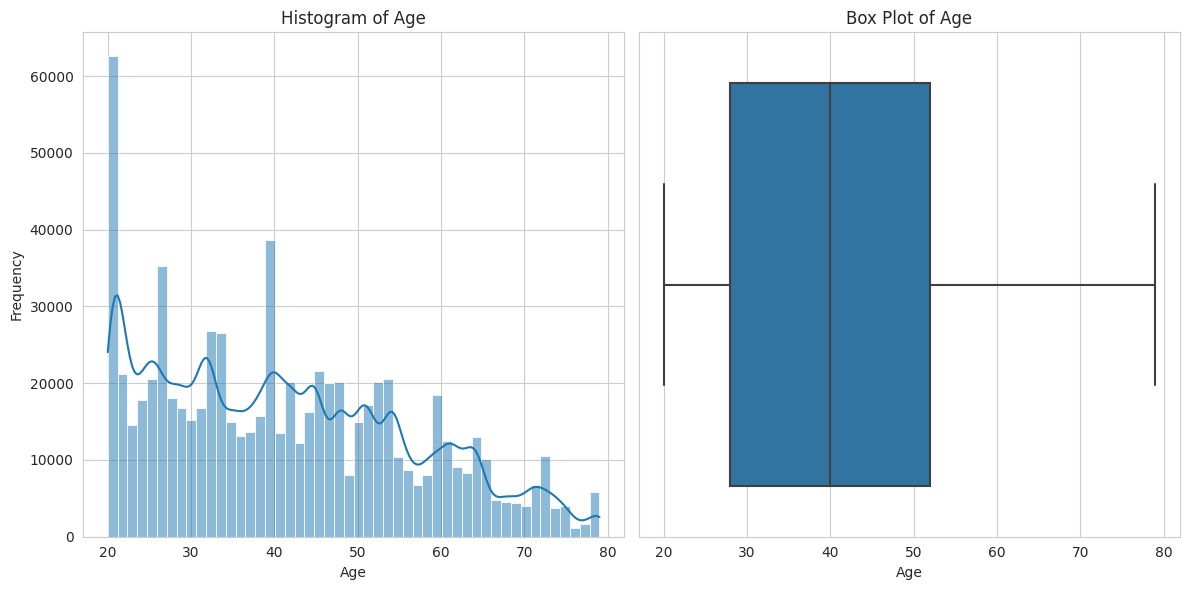


Statistics for Age:

Skewness: 0.44

Number of Missing Values: 0


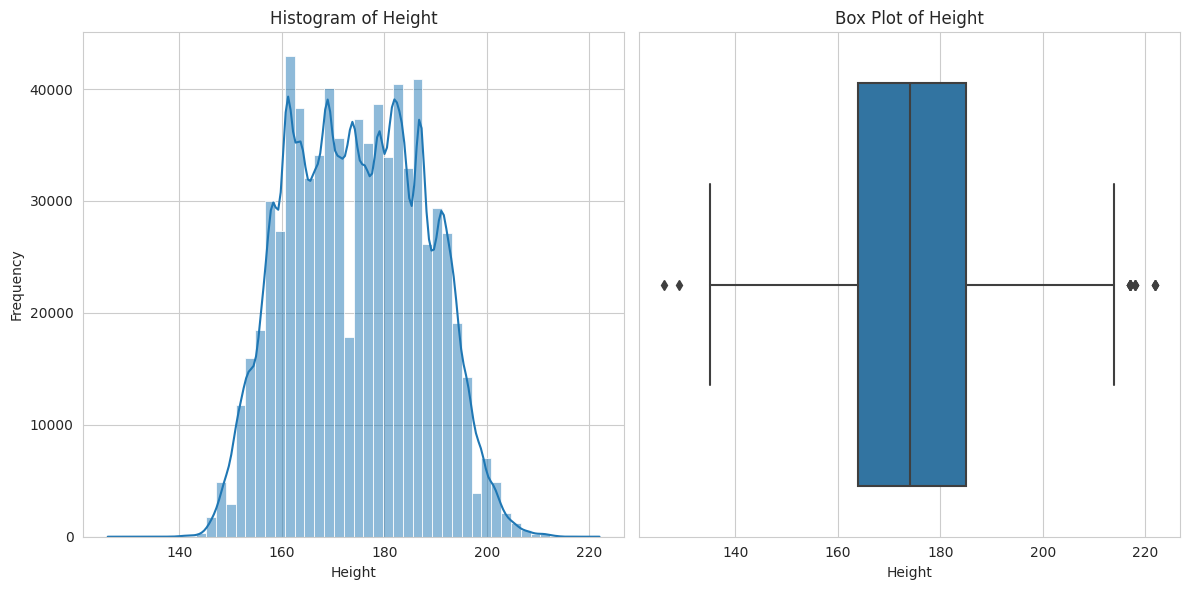


Statistics for Height:

Skewness: 0.05

Number of Missing Values: 0


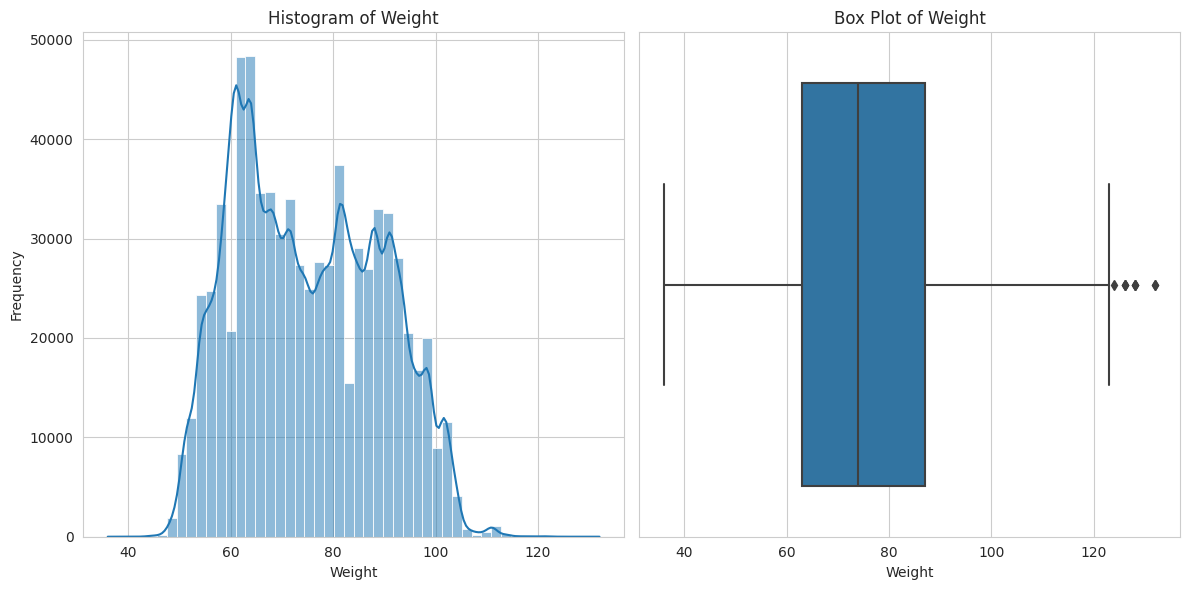


Statistics for Weight:

Skewness: 0.21

Number of Missing Values: 0


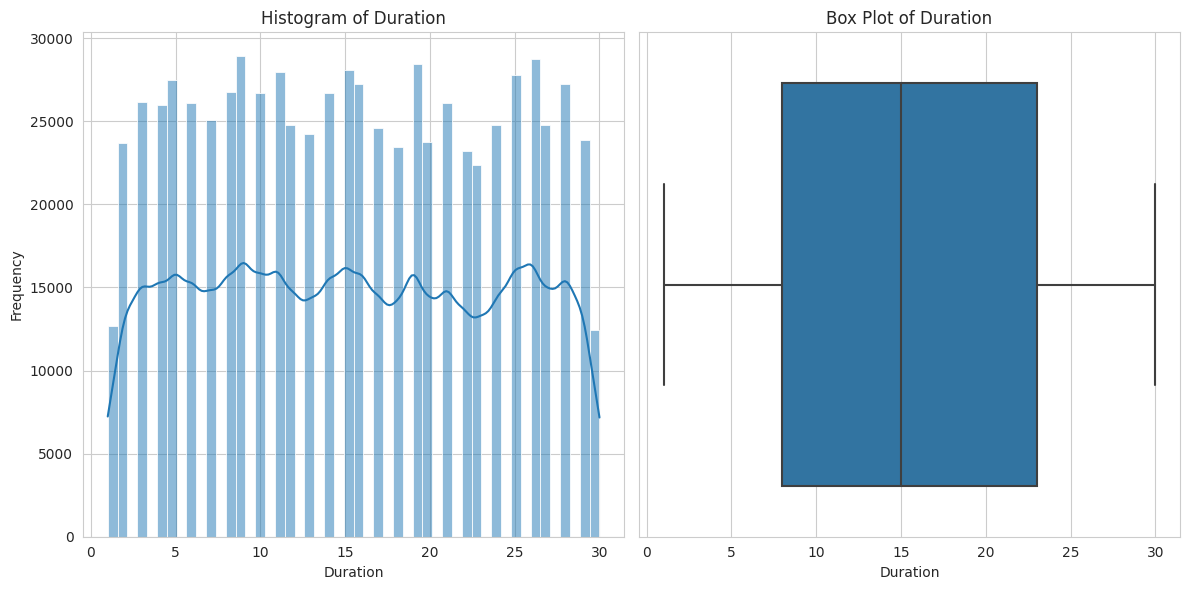


Statistics for Duration:

Skewness: 0.03

Number of Missing Values: 0


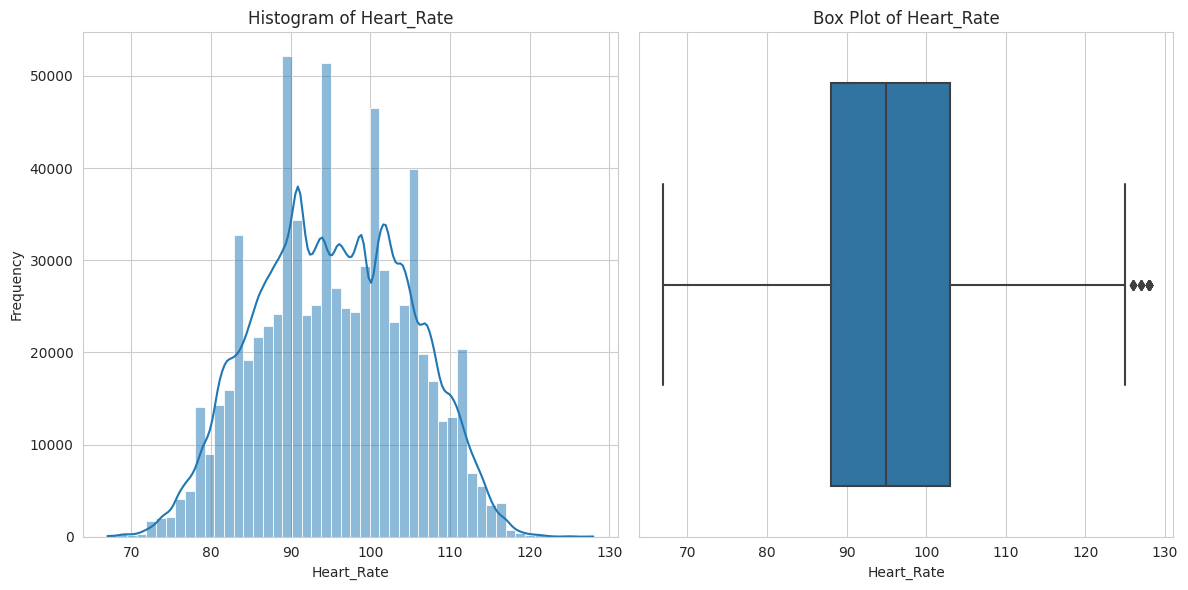


Statistics for Heart_Rate:

Skewness: -0.01

Number of Missing Values: 0


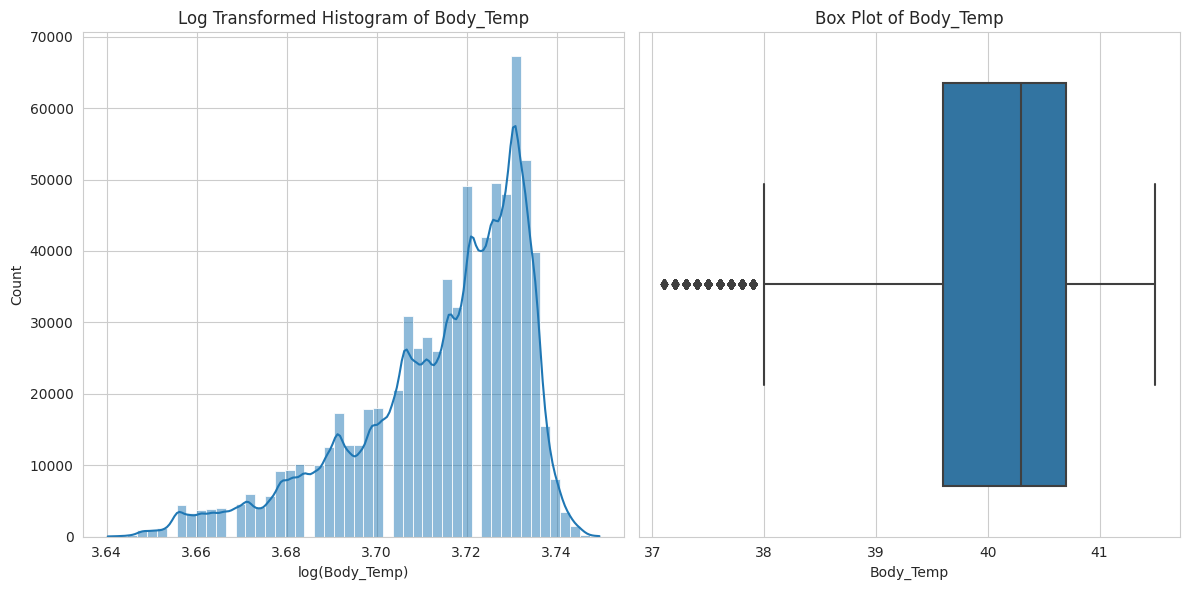


Statistics for Body_Temp:

Skewness: -1.02

Number of Missing Values: 0


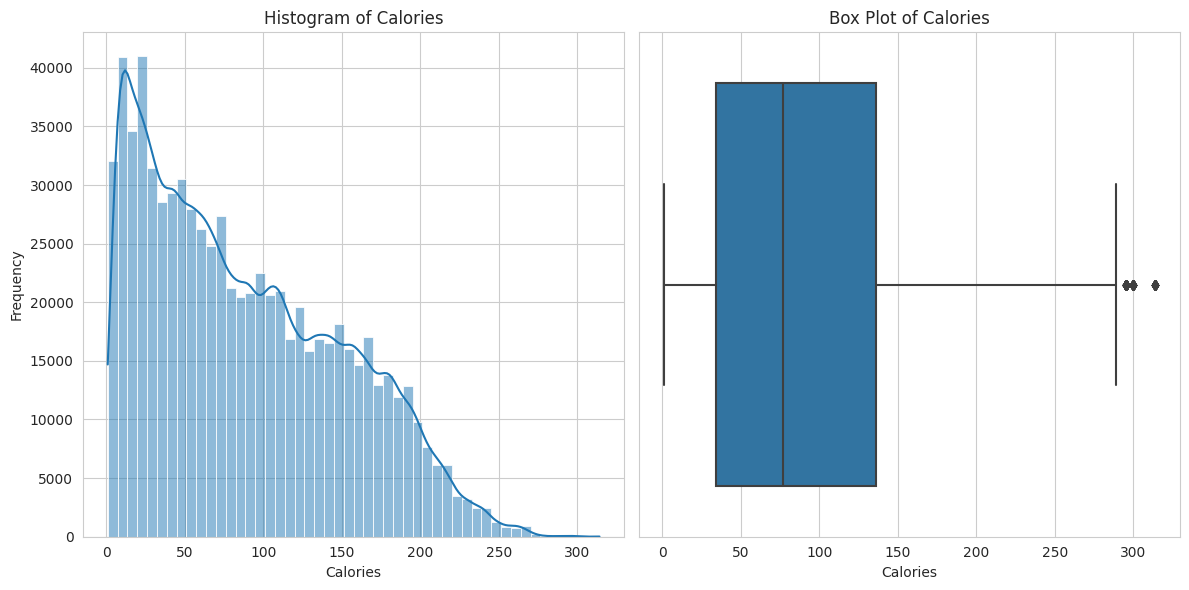


Statistics for Calories:

Skewness: 0.54

Number of Missing Values: 0


In [7]:
numerical_features = d_train.columns[2:]

for feature in numerical_features:  
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    if abs(d_train[feature].skew()) < 1: 
        sns.histplot(d_train[feature], kde=True, bins=50)
        plt.xlabel(feature)
        plt.title(f'Histogram of {feature}')
        plt.ylabel('Frequency')

    else:
        sns.histplot(np.log1p(d_train[feature]), kde=True, bins=50)
        plt.title(f'Log Transformed Histogram of {feature}')
        plt.xlabel(f'log({feature})')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=d_train[feature])
    plt.title(f'Box Plot of {feature}')

    plt.tight_layout()
    plt.show()

    print(f'\nStatistics for {feature}:')
    print(f'\nSkewness: {d_train[feature].skew():.2f}')
    print(f'\nNumber of Missing Values: {d_train[feature].isnull().sum()}')
    

# Categorical Feature

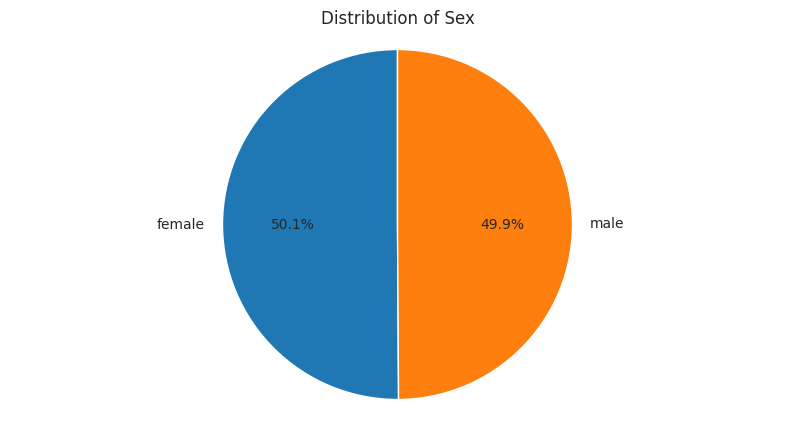

Number of Unique Calories: 277
Missing Values in Calories: 0


In [8]:
sex_counts = d_train['Sex'].value_counts()

plt.figure(figsize=(10, 5))
plt.pie(x=sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sex')
plt.axis('equal')

plt.show()

print(f"Number of Unique {feature}: {d_train[feature].nunique()}")
print(f"Missing Values in {feature}: {d_train[feature].isnull().sum()}")

# **KDE Plot**

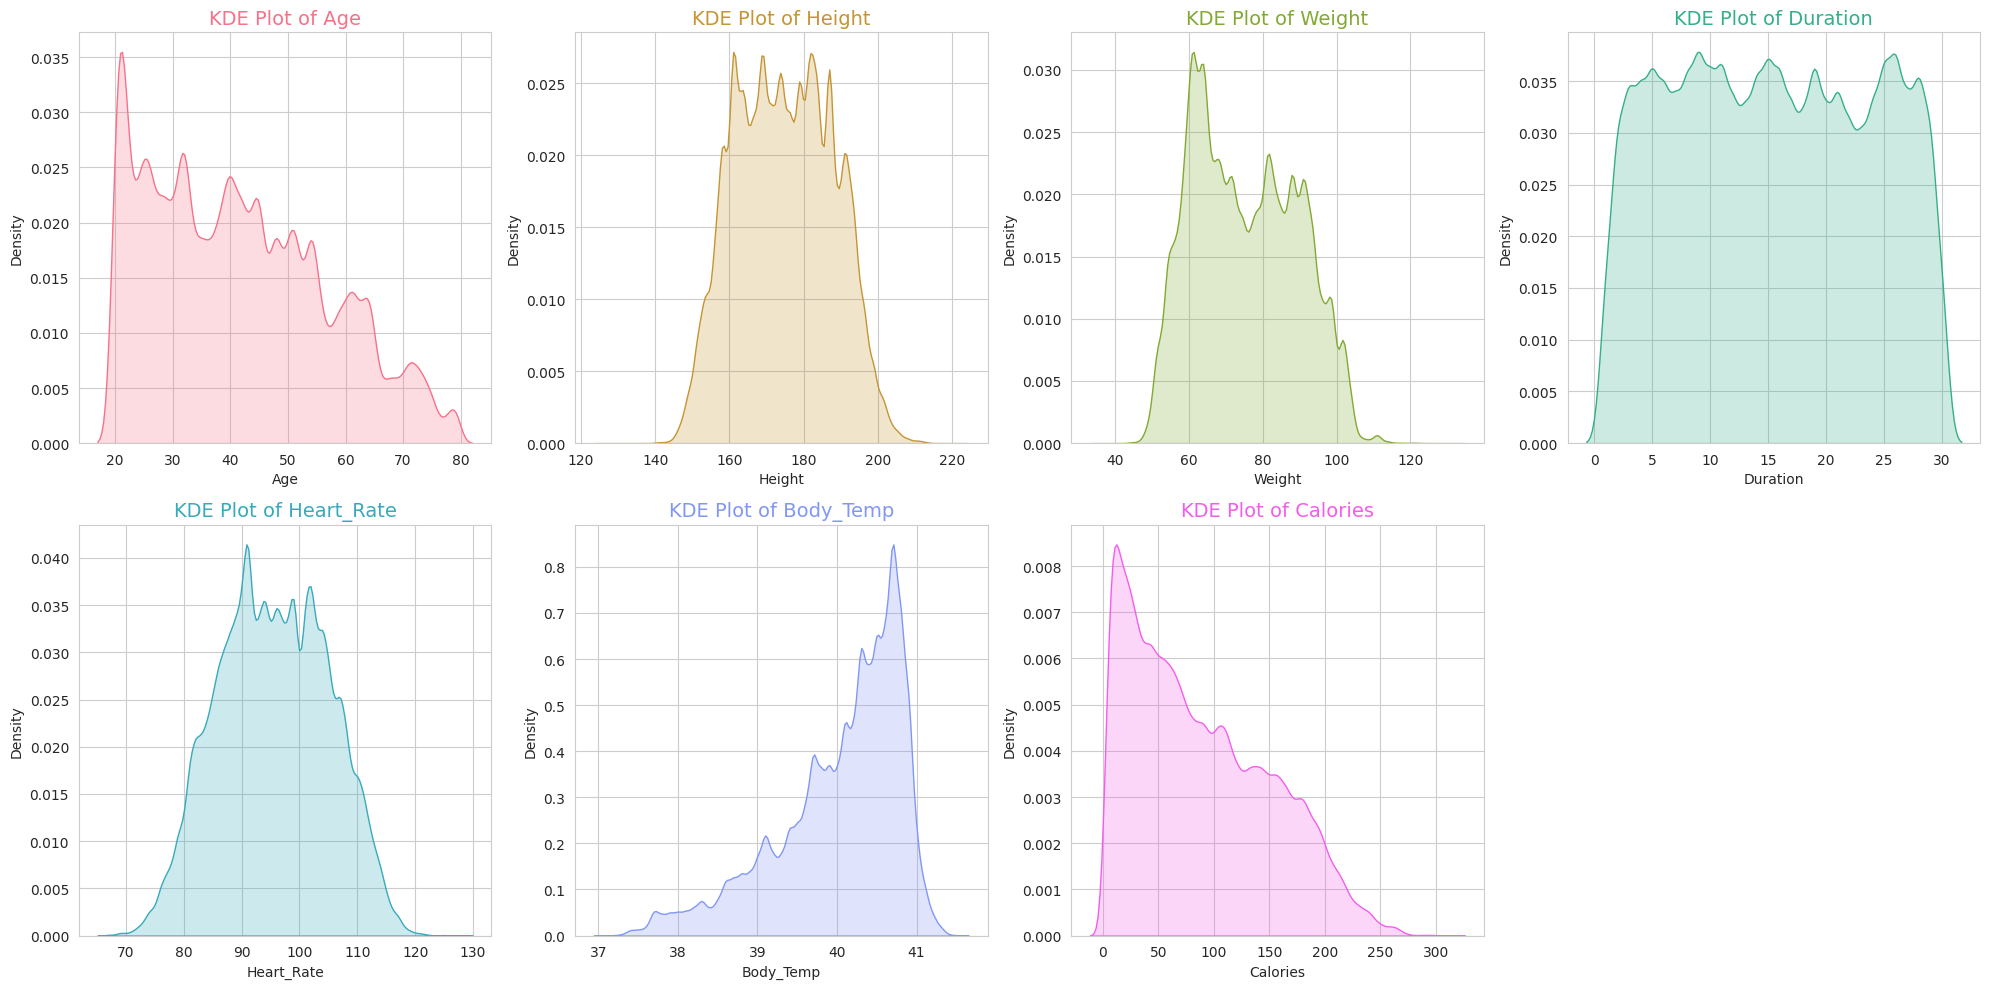

In [9]:
colors = sns.color_palette('husl', len(numerical_features))

rows = -(-len(numerical_features) // 4)
plt.figure(figsize=(20, 5 * rows))

for i, (col, color) in enumerate(zip(numerical_features, colors), 1):
    plt.subplot(rows, 4, i)
    sns.kdeplot(data=d_train, x=col, fill=True, color=color)
    plt.title(f'KDE Plot of {col}', fontsize=14, color=color)
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

# **Pairplot**

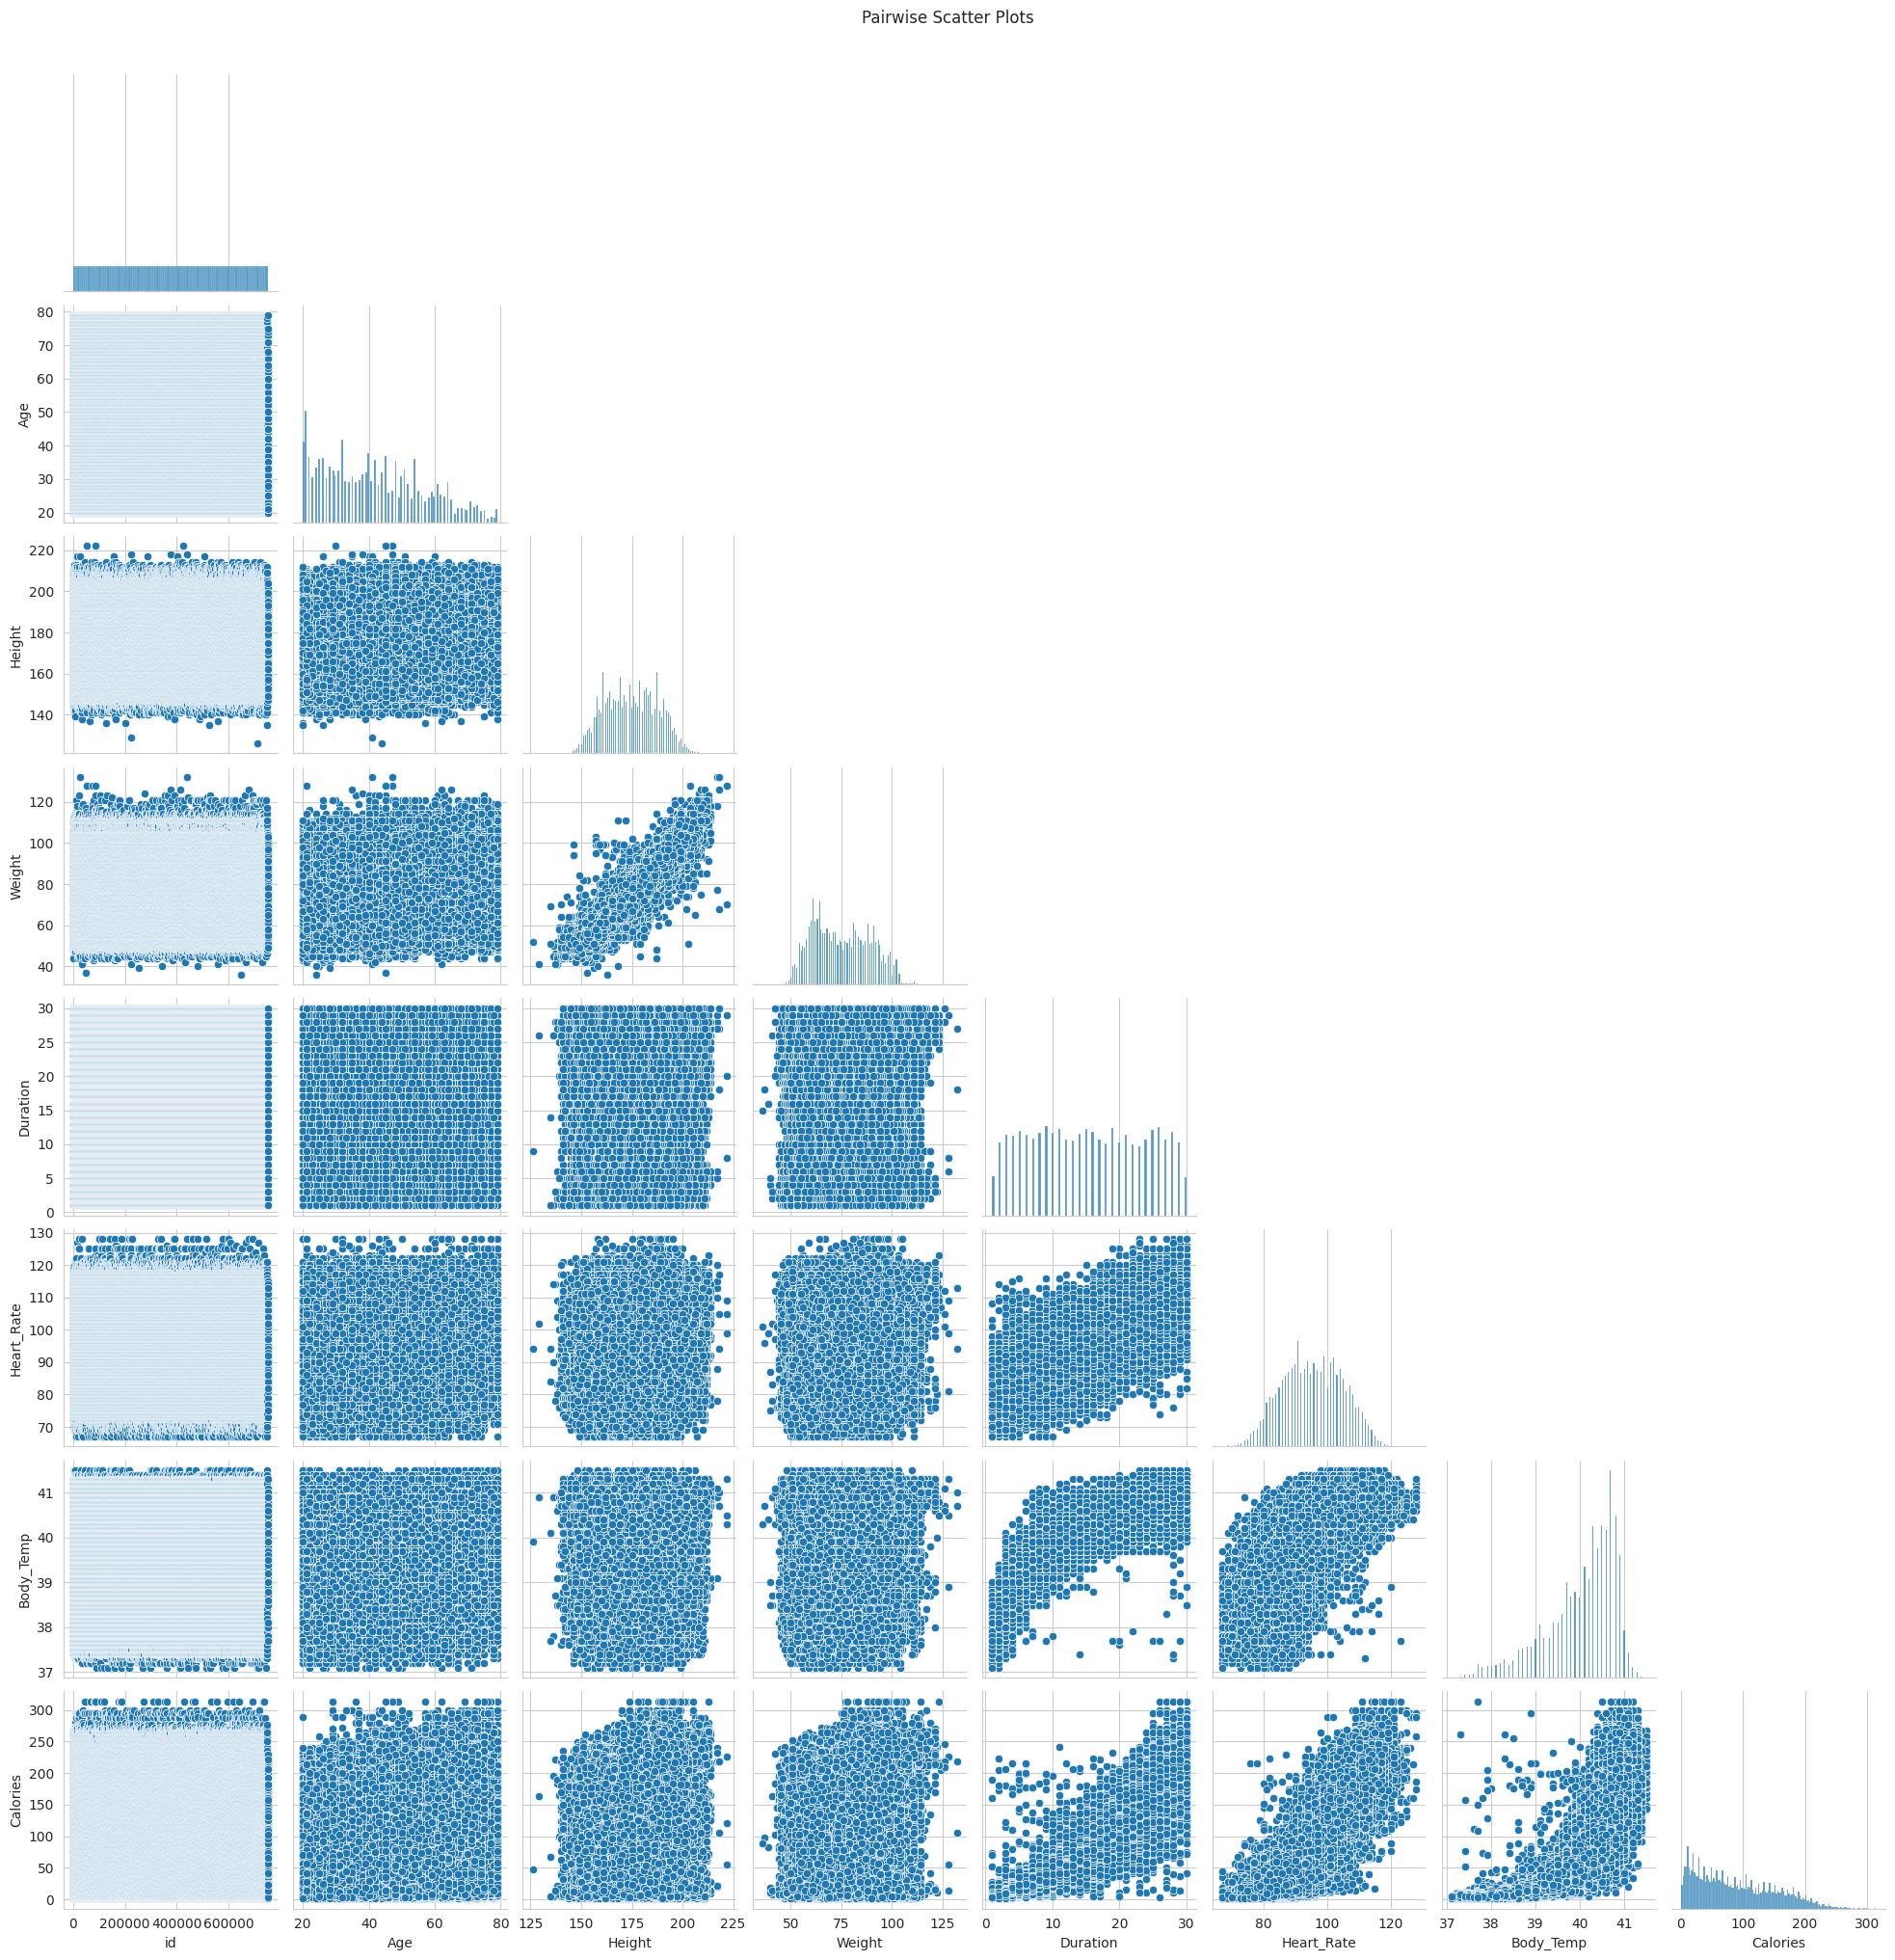

In [10]:
numeric_df = d_train.select_dtypes(include='number')

sns.pairplot(data=numeric_df, corner=True)
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

# **Analysis of categorical and numerical features by groups.**

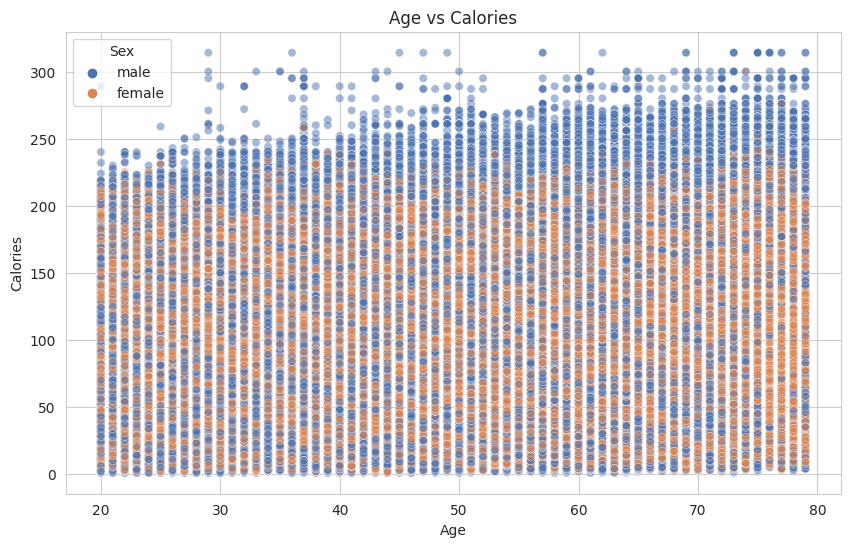

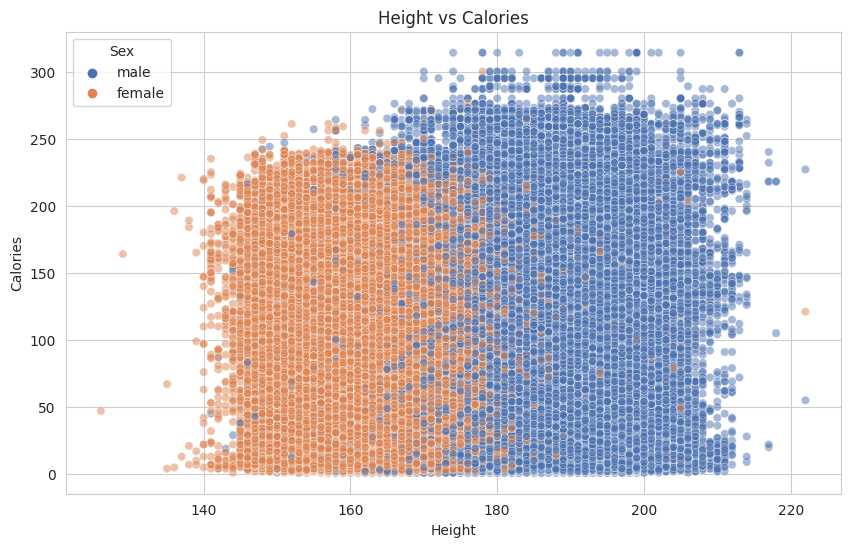

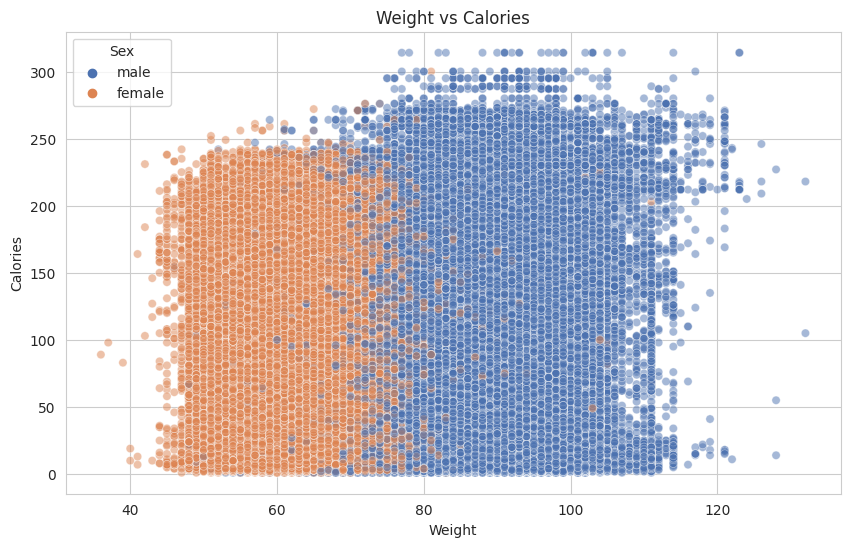

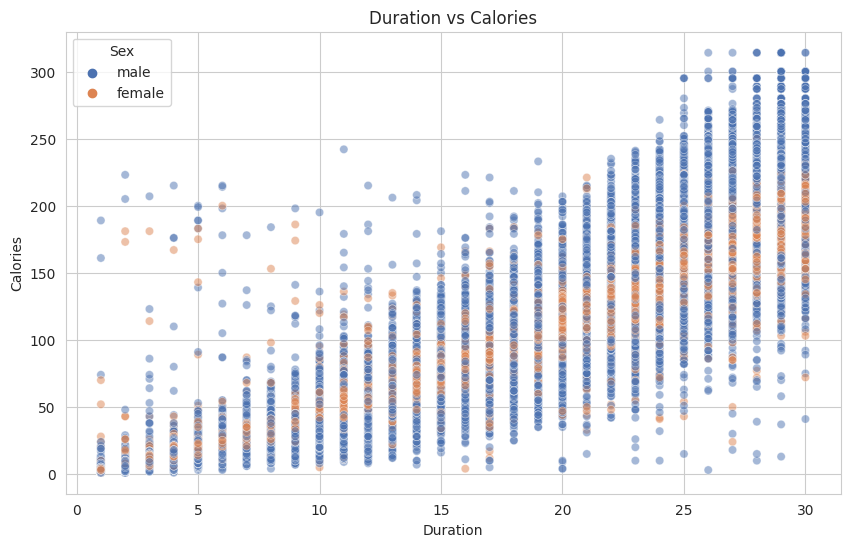

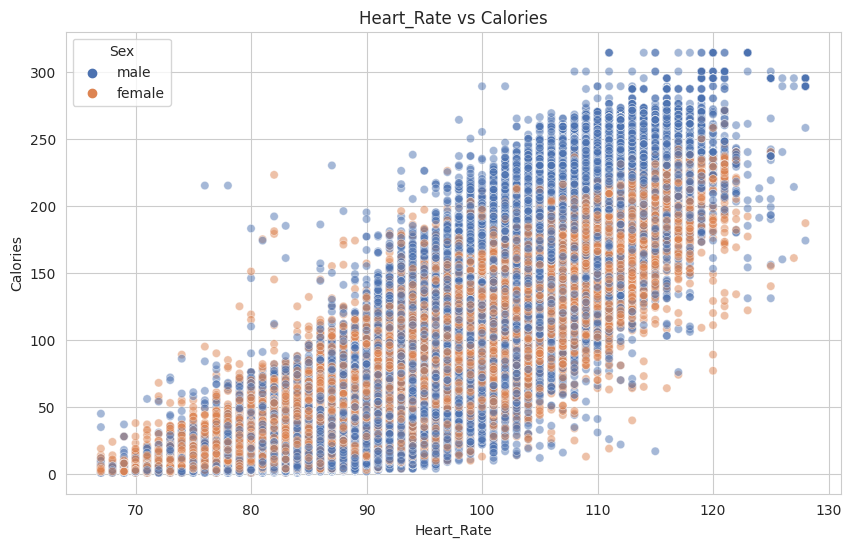

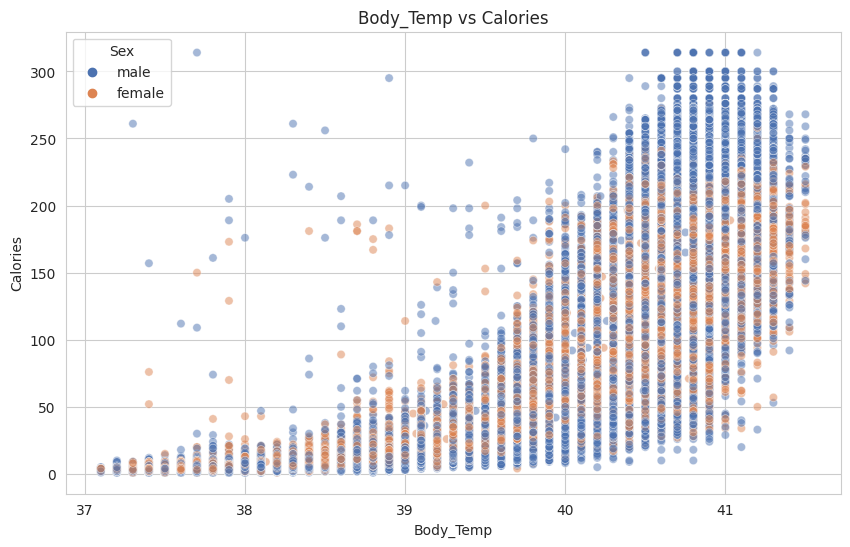

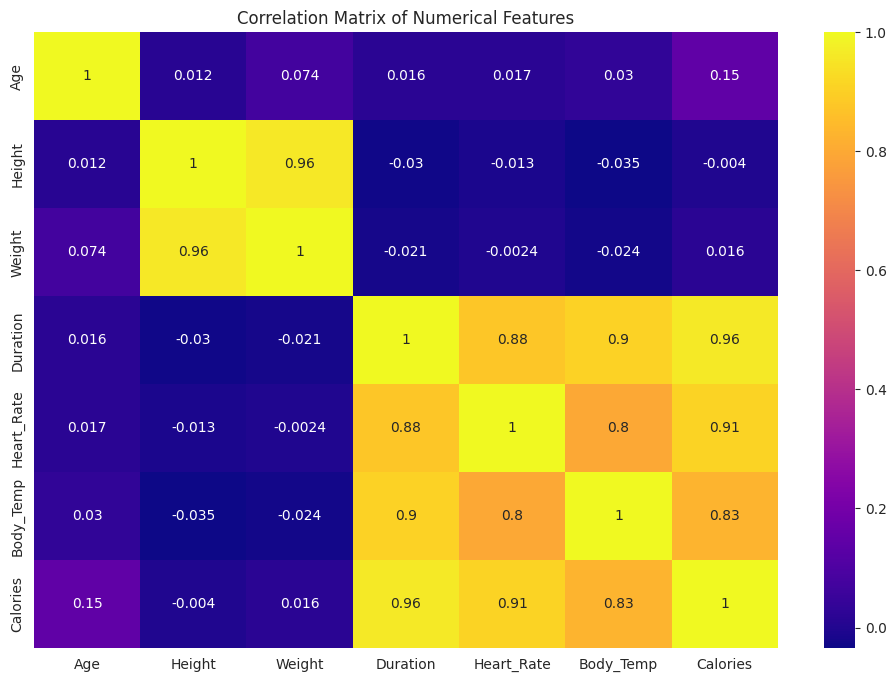

In [11]:
for feature in numerical_features[:-1]:
    plt.figure(figsize=(10, 6))
    
    sns.scatterplot(x=d_train[feature], y=d_train['Calories'], hue=d_train['Sex'], palette='deep', alpha=0.5)
    plt.title(f'{feature} vs Calories')
    plt.xlabel(feature)
    plt.ylabel('Calories')
    plt.show()

df_corr = d_train[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, cmap='plasma', annot=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# **Categorical Feature vs Label**

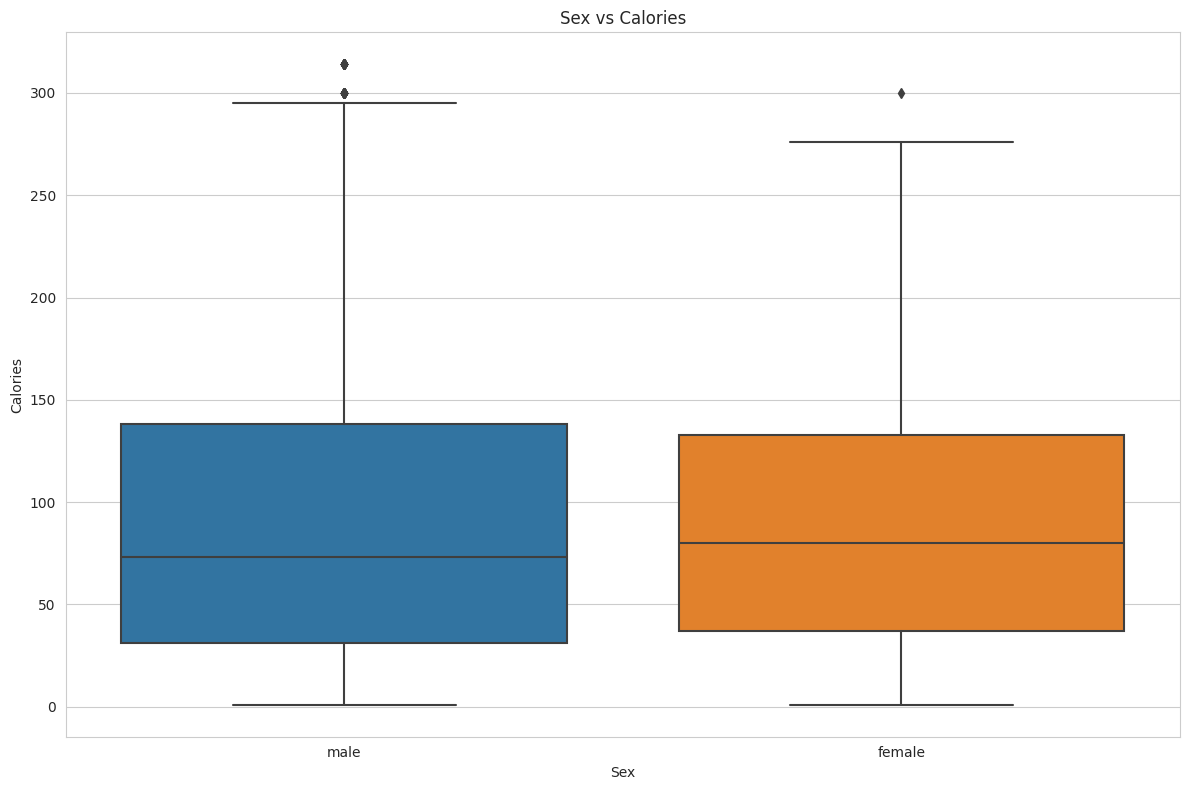

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=d_train['Sex'], y=d_train['Calories'], )
plt.title('Sex vs Calories')
plt.xlabel('Sex')
plt.ylabel('Calories')
plt.tight_layout()
plt.show()

# **Violin Plot**

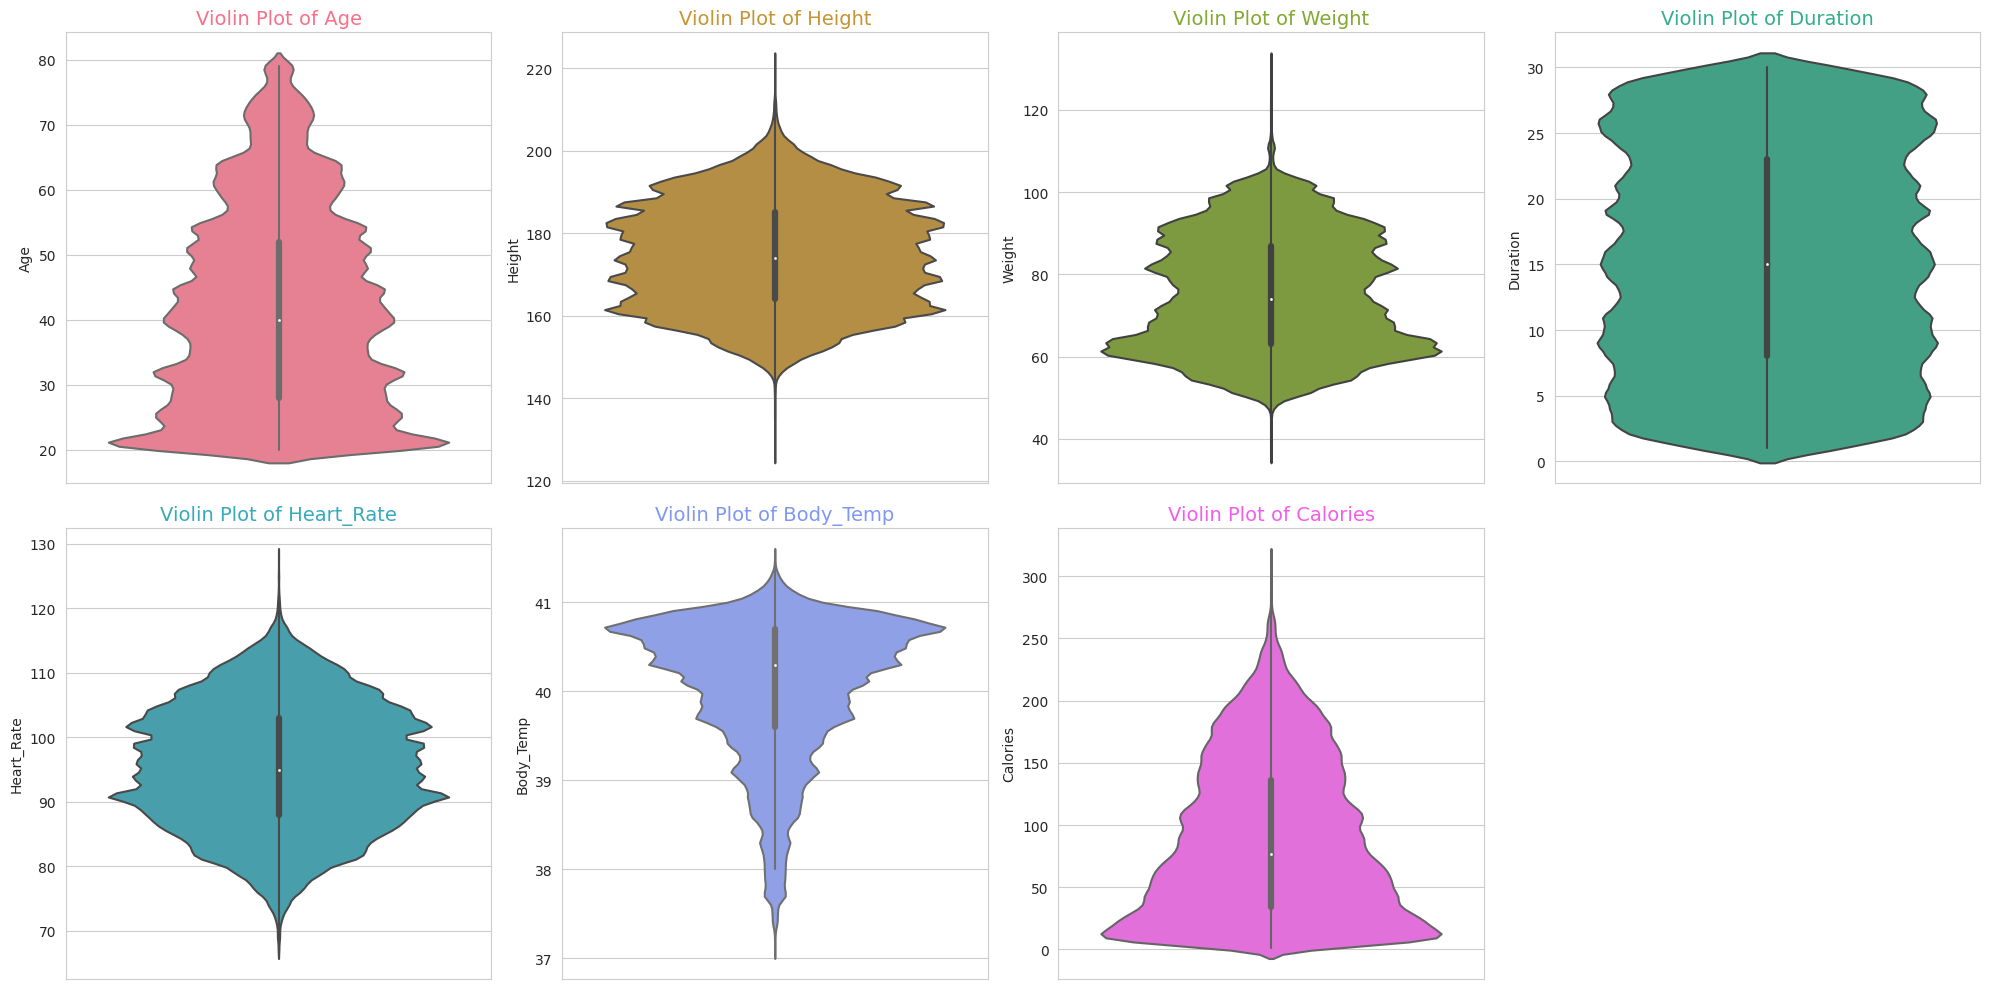

In [13]:
colors = sns.color_palette('husl', len(numerical_features))
rows = -(-len(numerical_features) // 4)
plt.figure(figsize=(20, 5 * rows))

for i, (col, color) in enumerate(zip(numerical_features, colors), 1):
    plt.subplot(rows, 4, i)
    sns.violinplot(data=d_train, y=col, color=color)
    plt.title(f'Violin Plot of {col}', fontsize=14, color=color)
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [14]:
for col in numerical_features:
    Q1 = d_train[col].quantile(0.25)
    Q3 = d_train[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = d_train[(d_train[col] < Q1 - 1.5 * IQR) | (d_train[col] > Q3 + 1.5 * IQR)]
    print(f'{col}: {len(outliers)} outliers')

Age: 0 outliers
Height: 14 outliers
Weight: 9 outliers
Duration: 0 outliers
Heart_Rate: 36 outliers
Body_Temp: 14919 outliers
Calories: 139 outliers


# **Processing categorical features**

In [15]:
d_test = pd.read_csv('/kaggle/input/playground-series-s5e5/test.csv')
d_test.head(5)

id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  750000    male   45   177.0    81.0       7.0        87.0       39.8
1  750001    male   26   200.0    97.0      20.0       101.0       40.5
2  750002  female   29   188.0    85.0      16.0       102.0       40.4
3  750003  female   39   172.0    73.0      20.0       107.0       40.6
4  750004  female   30   173.0    67.0      16.0        94.0       40.5

In [16]:
train = d_train.copy()
test = d_test.copy()


train = pd.get_dummies(train, columns=['Sex'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex'], drop_first=True)

missing_cols = set(train.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0  

test = test[train.columns.drop('Calories')]

# **Feature scaling**

In [17]:
from sklearn.preprocessing import StandardScaler

data_to_scale = [feat for feat in numerical_features if feat != 'Calories']

scaler = StandardScaler()

train[data_to_scale] = scaler.fit_transform(train[data_to_scale])

test[data_to_scale] = scaler.transform(test[data_to_scale])

train['Calories'] = np.log1p(train['Calories'])

In [18]:
train.drop('id', axis=1, inplace=True)
train.head(10)

Age    Height    Weight  Duration  Heart_Rate  Body_Temp  Calories  \
0 -0.357192  1.115235  0.490201  1.266324    0.583714   1.235772  5.017280   
1  1.487943 -0.912137 -1.083172 -0.888309   -1.109436  -0.431163  3.555348   
2  0.631273 -1.068088 -0.797104 -1.008011   -1.215258  -0.302938  3.401197   
3 -1.411555  1.349162  1.062337  1.146622    1.007002   0.851095  4.948760   
4 -0.225397 -0.678209 -1.011655  1.146622    0.689536   0.722869  4.990433   
5 -1.016169 -1.457968 -1.369240  0.428411    0.477892   0.594643  4.644391   
6 -1.345657 -0.210354 -0.153452 -1.486818   -1.532724  -2.226325  2.302585   
7  0.301785  1.037259  1.348405  0.907219    0.477892   0.979321  4.983607   
8 -0.554885 -0.678209 -0.868621  1.146622    1.218646   0.594643  5.087596   
9  1.553841  0.803332  0.919303  0.907219    0.901180   1.235772  5.225747   

   Sex_male  
0      True  
1     False  
2     False  
3      True  
4     False  
5     False  
6     False  
7      True  
8     False  
9      True

# **Making new features**

In [19]:
# BMI
train['BMI'] = train['Weight'] / (train['Height'] / 100)**2
test['BMI'] = test['Weight'] / (test['Height'] / 100)**2

# Intensity
train['Intensity'] = train['Heart_Rate'] / train['Duration']
test['Intensity'] = test['Heart_Rate'] / test['Duration']


man_temp_mean = train.loc[train['Sex_male'] == True, 'Body_Temp'].mean()
woman_temp_mean = train.loc[train['Sex_male'] == False, 'Body_Temp'].mean()

# Temp Deviation
train['Temp_Deviation'] = train.apply(
    lambda row: row['Body_Temp'] - man_temp_mean if row['Sex_male'] else row['Body_Temp'] - woman_temp_mean,
    axis=1
)
test['Temp_Deviation'] = test.apply(
    lambda row: row['Body_Temp'] - man_temp_mean if row['Sex_male'] else row['Body_Temp'] - woman_temp_mean,
    axis=1
)

# High Heart Rate
high_hr_threshold = train['Heart_Rate'].quantile(0.95)

train['High_Heart_Rate'] = (train['Heart_Rate'] > high_hr_threshold).astype(int)
test['High_Heart_Rate'] = (test['Heart_Rate'] > high_hr_threshold).astype(int)

# Age Group
bins = [0, 18, 30, 45, 60, 100]
labels = ['Teen', 'Young', 'Adult', 'Middle', 'Senior']

train['Age_Group'] = pd.cut(train['Age'], bins=bins, labels=labels)
test['Age_Group'] = pd.cut(test['Age'], bins=bins, labels=labels)

# One-hot encoding Age_Group
train = pd.get_dummies(train, columns=['Age_Group'], drop_first=True)
test = pd.get_dummies(test, columns=['Age_Group'], drop_first=True)

missing_cols = set(train.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0 
test = test[train.columns.drop('Calories')]  

# **XGBoost**

In [20]:
from sklearn.model_selection import train_test_split

X = train.drop(columns='Calories')
y = np.log1p(train['Calories'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimator=100, learning_rate=0.1, max_depth=6, random_state=42)

model.fit(X_train, y_train)

preds = model.predict(X_valid)

# **Model Evaluation**

In [22]:
from sklearn.metrics import mean_squared_log_error

In [23]:
preds = np.expm1(preds)
y_valid_true = np.expm1(y_valid)

In [24]:
RMSLE = mean_squared_log_error(preds, y_valid_true)

print(f'RMSLE: {RMSLE:.4f}')

RMSLE: 0.0003


# **Residual analysis**

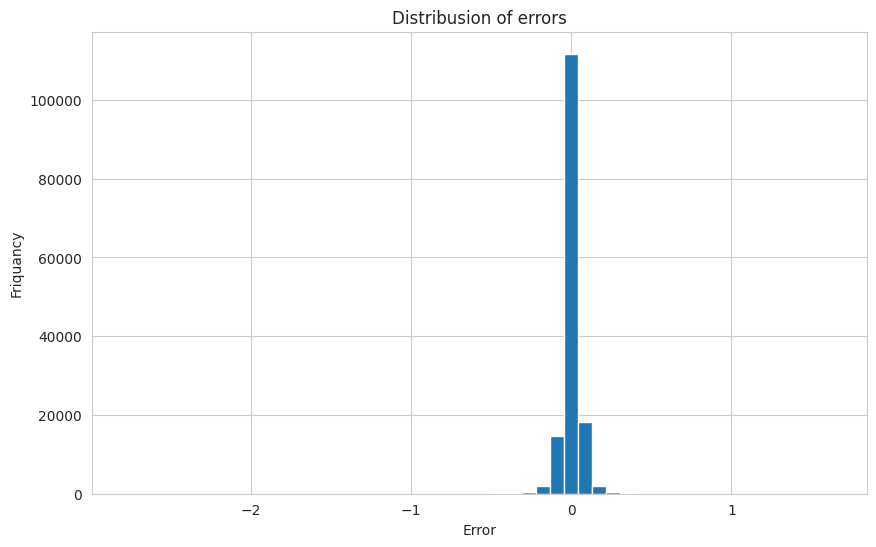

In [25]:
errors = y_valid_true - preds

plt.figure(figsize=(10,6))
plt.hist(errors, bins=50)
plt.title('Distribusion of errors')
plt.xlabel('Error')
plt.ylabel('Friquancy')
plt.grid(True)
plt.show()

# **The Importance of Features**

<Figure size 1000x600 with 0 Axes>

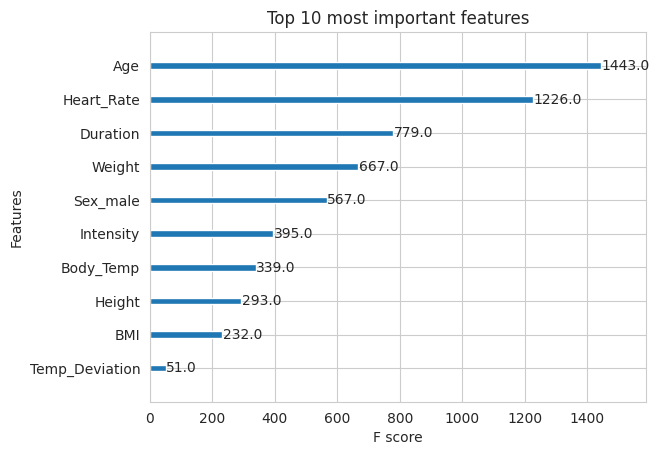

In [26]:
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=10)
plt.title("Top 10 most important features")
plt.show()

# **Hyperparameter tuning CV**

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [28]:
xgb = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, np.maximum(0, y_pred)))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

In [31]:
xgb = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=rmsle_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best RMSLE:", -grid_search.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8; total time=   7.8s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1.0; total time=   7.1s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=200, subsample=1.0; total time=  11.9s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=100, subsample=0.8; total time=   9.7s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=100, subsample=1.0; total time=   9.5s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=200, subsample=0.8; total time=  15.9s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   7.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1.0; total time=   6.3s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.8; total time=  10.7s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=200, subsample=1.0; total time=  10.0s
[CV

In [32]:
best_model = grid_search.best_estimator_


val_preds = best_model.predict(X_valid)
val_rmsle = rmsle(y_valid, val_preds)
print(f"Validation RMSLE: {val_rmsle:.5f}")

Validation RMSLE: 0.00841


In [33]:
test_submission = pd.read_csv('/kaggle/input/playground-series-s5e5/sample_submission.csv')

In [34]:
X_test = pd.read_csv('/kaggle/input/playground-series-s5e5/test.csv')

In [35]:
test_preds = best_model.predict(test)


submission = pd.DataFrame({
    'id': test_submission['id'],  
    'Calories': test_preds
})
submission['Calories'] = np.expm1(submission['Calories'])
submission.to_csv('submission.csv', index=False)

print("✅ Submission is done!")

✅ Submission is done!


In [36]:
submission.to_csv('submission.csv', index=False)